In [1]:
import rebound as rebound
import ipywidgets
import numpy as np
sim = rebound.Simulation()

In [2]:
sim.getWidget(size=(400,200),orbits=True,scale=80) #Widget to visualize simulation

Widget(count=2, height=200.0, orbits=True, orientation=(0.0, 0.0, 0.0, 1.0), overlay='REBOUND (ias15), N=0, t=…

In [3]:
#Adding the stars
sim.add(m=1.5,hash="A1") #A1, inner AGB star
sim.add(m=1,e=0, a=4,hash="A2") #A2, inner companion
sim.add(m=2.50,e=0, a=36,hash="B1") #B1, outer companion

# Move to the centre of mass frame for integration
sim.move_to_com() 

In [4]:
#Used for phase plot later
Periodinner=sim.particles[1].P/(2*np.pi)
Periodouter=sim.particles[-1].P/(2*np.pi)
print(Periodouter)#In years

96.59813662799091


In [5]:
#Setup to plot orbits later
Noutputs = 10000
year = sim.particles[-1].P # One year in units where G=1
orbits=10
times = np.linspace(0.,orbits*year, Noutputs)
#Pre-allocation for speed
x = np.zeros((3,Noutputs))
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))
a= np.zeros((2,Noutputs))
e = np.zeros((2,Noutputs))
ps = sim.particles 

In [6]:
#Integrate using standard IAS15 integrator -still have to check with Leap frog
for i,time in enumerate(times):
    sim.integrate(time)
    #Calculate outer companion
    orbitouter = ps[-1].calculate_orbit()
    #Calculate inner binary
    orbitinner= ps[1].calculate_orbit()
    # This stores the data which allows us to plot it later
    a[0][i] = orbitinner.a
    e[0][i] = orbitinner.e
    a[1][i] = orbitouter.a
    e[1][i] = orbitouter.e
    x[0][i] = ps[0].x   
    y[0][i] = ps[0].y
    z[0][i] = ps[0].z
    x[1][i] = ps[1].x  
    y[1][i] = ps[1].y
    z[1][i] = ps[1].z
    x[2][i] = ps[2].x   
    y[2][i] = ps[2].y
    z[2][i] = ps[2].z


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [7]:
sim.status() #extra info

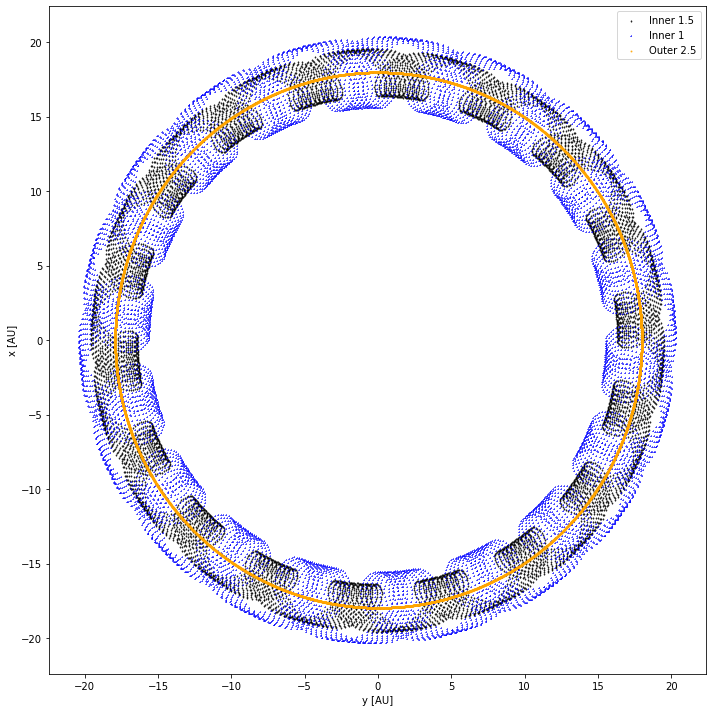

In [8]:
#Plot orbits
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.set_xlabel("y [AU]")
ax.set_ylabel("x [AU]")
plt.scatter(x[0], y[0], marker='d',s=1,color='k',alpha=0.75,label='Inner 1.5')
plt.scatter(x[1], y[1], marker='+',s=1,color='b',alpha=0.75,label='Inner 1')
plt.scatter(x[2], y[2], marker='o',s=1,color='orange',alpha=0.75,label='Outer 2.5')
plt.legend()
plt.tight_layout()

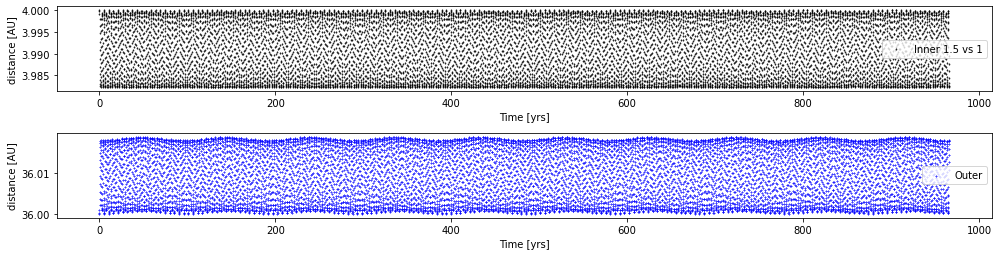

In [9]:
#Plot semi major axis, to check orbits are stable
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(311)
ax2 = plt.subplot(312)
ax.set_xlabel("Time [yrs]")
ax.set_ylabel("distance [AU]")
ax2.set_xlabel("Time [yrs]")
ax2.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
distance2 = np.sqrt(np.square(x[2])+np.square(y[2])+np.square(z[2]))
ax.scatter(times/(2*np.pi), a[0], marker='d',s=1,color='k',alpha=0.75,label='Inner 1.5 vs 1')
#ax.scatter(((times/(2*np.pi))%Periodouter)/Periodouter, a[0], marker='d',s=1,color='k',alpha=0.75,label='Inner 1.5 vs 1')
ax2.scatter(times/(2*np.pi), a[1], marker='x',s=1,color='b',alpha=0.75,label='Outer')
ax.legend()
ax2.legend()
plt.tight_layout()

In [10]:
#Just some extra info
for p in sim.particles: 
    print(p.x, p.y, p.z)
for o in sim.calculate_orbits(): 
    print(o)

-16.899434543636595 -6.005505378517271 0.0
-18.225897787314484 -2.2229368688798488 0.0
17.430019841107853 4.4924779746620755 0.0
<rebound.Orbit instance, a=3.982546846271942 e=0.006766451240637126 inc=0.0 Omega=0.0 omega=4.76653685886478 f=3.4247234012425807>
<rebound.Orbit instance, a=36.01799028149634 e=0.0005562726488289086 inc=0.0 Omega=0.0 omega=0.6252361520884389 f=5.910202631977898>


In [11]:
%matplotlib inline #Built in plotting tool test
op = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

ops = rebound.OrbitPlotSet(sim)

UsageError: unrecognized arguments: #Built in plotting tool test


In [12]:
sim.cite()

Simulations in this paper made use of the REBOUND N-body code \citep{rebound}. The simulations were integrated using IAS15, a 15th order Gauss-Radau integrator \citep{reboundias15}. 


@ARTICLE{rebound,
       author = {{Rein}, H. and {Liu}, S. -F.},
        title = "{REBOUND: an open-source multi-purpose N-body code for collisional dynamics}",
      journal = {\aap},
     keywords = {methods: numerical, planets and satellites: rings, protoplanetary disks, Astrophysics - Earth and Planetary Astrophysics, Astrophysics - Instrumentation and Methods for Astrophysics, Mathematics - Dynamical Systems, Physics - Computational Physics},
         year = 2012,
        month = jan,
       volume = {537},
          eid = {A128},
        pages = {A128},
          doi = {10.1051/0004-6361/201118085},
archivePrefix = {arXiv},
       eprint = {1110.4876},
 primaryClass = {astro-ph.EP},
       adsurl = {https://ui.adsabs.harvard.edu/abs/2012A&A...537A.128R},
      adsnote = {Provided by the SAO/NASA A